ライブラリのインポート

In [1]:
#探索のためのライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set()
import warnings

#各種設定
warnings.simplefilter('ignore')
pd.options.display.max_rows=500
pd.options.display.max_columns=50
pd.options.display.float_format = '{:.2f}'.format

データの読み込み

In [2]:
#データの読み込み
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_add = pd.read_csv('train_add.csv')
add_2014 = pd.read_csv('2014_add.csv')
stadium = pd.read_csv('stadium.csv')
condition = pd.read_csv('condition.csv')
condition_add = pd.read_csv('condition_add.csv')

データの内容の確認

In [3]:
#データの中身とshapeの確認
print('train: ', train.shape)
print('train_add: ', train_add.shape)
print('test: ', test.shape)
print('condition: ', condition.shape)
print('condition_add: ', condition_add.shape)
print('stadium: ', stadium.shape)

train:  (1721, 11)
train_add:  (232, 11)
test:  (313, 10)
condition:  (2034, 31)
condition_add:  (270, 31)
stadium:  (59, 3)


In [4]:
#train, train_add
display(train.head(), train_add.head())

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌


,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,14003,19010,2012,Ｊ１,第２節第１日,03/17(土),14:04,鹿島アントラーズ,川崎フロンターレ,県立カシマサッカースタジアム,スカパー／ｅ２／スカパー光／ＮＨＫ水戸
1,14020,15072,2012,Ｊ１,第３節第２日,03/25(日),19:03,ガンバ大阪,ジュビロ磐田,万博記念競技場,スカパー／ｅ２／スカパー光
2,14023,25743,2012,Ｊ１,第４節第１日,03/31(土),15:03,浦和レッズ,川崎フロンターレ,埼玉スタジアム２００２,スカパー／ｅ２／スカパー光／テレ玉
3,14076,24183,2012,Ｊ１,第１０節第１日,05/06(日),13:03,横浜Ｆ・マリノス,コンサドーレ札幌,日産スタジアム,スカパー／ｅ２／スカパー光
4,14081,20512,2012,Ｊ１,第１０節第１日,05/06(日),17:03,名古屋グランパス,川崎フロンターレ,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／名古屋テレビ（録）


In [5]:
#test
test.head()

,id,year,stage,match,gameday,time,home,away,stadium,tv
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉
3,15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス
4,15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス


In [6]:
#condition, condition_add
display(condition.head(), condition_add.head())

,id,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,1,0,雨,3.80,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,1,0,屋内,12.40,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,2,3,晴一時雨,11.30,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,1,0,曇一時雨のち晴,11.40,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,0,0,屋内,22.50,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


,id,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,14003,0,1,雨,13.30,86%,西村 雄一,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,柴崎 岳,増田 誓志,小笠原 満男,遠藤 康,大迫 勇也,ジュニーニョ,川崎フロンターレ,西部 洋平,實藤 友紀,ジェシ,森下 俊,小宮山 尊信,中村 憲剛,柴崎 晃誠,田坂 祐介,山瀬 功治,レナト,小松 塁
1,14020,1,2,曇,4.60,56%,家本 政明,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,武井 択也,遠藤 保仁,二川 孝広,パウリーニョ,ラフィーニャ,イ スンヨル,ジュビロ磐田,八田 直樹,駒野 友一,チョ ビョングク,藤田 義明,金沢 浄,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一
2,14023,1,1,雨,10.00,65%,家本 政明,浦和レッズ,加藤 順大,坪井 慶介,永田 充,槙野 智章,平川 忠亮,鈴木 啓太,阿部 勇樹,梅崎 司,柏木 陽介,矢島 慎也,ポポ,川崎フロンターレ,安藤 駿介,田中 裕介,ジェシ,森下 俊,小宮山 尊信,中村 憲剛,柴崎 晃誠,田坂 祐介,山瀬 功治,レナト,小松 塁
3,14076,2,1,晴,27.90,47%,今村 義朗,横浜Ｆ・マリノス,飯倉 大樹,小林 祐三,栗原 勇蔵,中澤 佑二,ドゥトラ,富澤 清太郎,兵藤 慎剛,中村 俊輔,齋藤 学,小野 裕二,大黒 将志,コンサドーレ札幌,李 昊乗,日高 拓磨,ジェイド ノース,櫛引 一紀,岩沼 俊介,河合 竜二,宮澤 裕樹,古田 寛幸,近藤 祐介,高木 純平,前田 俊介
4,14081,2,3,晴,19.00,48%,吉田 寿光,名古屋グランパス,楢﨑 正剛,石櫃 洋祐,ダニエル,田中 マルクス闘莉王,三都主 アレサンドロ,中村 直志,ダニルソン,藤本 淳吾,玉田 圭司,金崎 夢生,ケネディ,川崎フロンターレ,西部 洋平,田中 裕介,井川 祐輔,森下 俊,登里 享平,稲本 潤一,中村 憲剛,大島 僚太,田坂 祐介,楠神 順平,矢島 卓郎


In [7]:
#stadium
stadium.head()

,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000
1,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576


In [8]:
#columnsの確認
train.columns, condition.columns

(Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
        'stadium', 'tv'],
       dtype='object'),
 Index(['id', 'home_score', 'away_score', 'weather', 'temperature', 'humidity',
        'referee', 'home_team', 'home_01', 'home_02', 'home_03', 'home_04',
        'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10',
        'home_11', 'away_team', 'away_01', 'away_02', 'away_03', 'away_04',
        'away_05', 'away_06', 'away_07', 'away_08', 'away_09', 'away_10',
        'away_11'],
       dtype='object'))

 データの結合

In [9]:
#trainとtrain_addを結合
full_train = pd.concat([train, train_add], axis=0)

#結合後のshape
print('train :', train.shape)
print('train_add :', train_add.shape)
print('full_train :', full_train.shape)

train : (1721, 11)
train_add : (232, 11)
full_train : (1953, 11)


In [10]:
#conditionとcondition_addの結合
full_condition = pd.concat([condition, condition_add], axis=0)

#結合後のshape
print('condition :', condition.shape)
print('condition_add :', condition_add.shape)
print('full_condition :', full_condition.shape)

condition : (2034, 31)
condition_add : (270, 31)
full_condition : (2304, 31)


In [11]:
#特徴量の結合
stadium = stadium.rename(columns={'name': 'stadium'})

full_train = pd.merge(full_train, stadium, on='stadium', how='left')
full_train = pd.merge(full_train, full_condition, on='id', how='left')
full_test = pd.merge(test, stadium, on='stadium', how='left')
full_test = pd.merge(full_test, full_condition, on='id', how='left')

#結合後の確認
display(full_train.head(), full_test.head())
print('full_train: ', full_train.shape)
print('full_test: ', full_test.shape)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,宮城県仙台市泉区七北田字柳78,19694,1,0,雨,3.80,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,愛知県豊田市千石町7-2,40000,1,0,屋内,12.40,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,大阪府吹田市千里万博公園5-2,21000,2,3,晴一時雨,11.30,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,広島県広島市安佐南区大塚西5-1-1,50000,1,0,曇一時雨のち晴,11.40,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,北海道札幌市豊平区羊ヶ丘1,39232,0,0,屋内,22.50,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


,id,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス,宮城県仙台市泉区七北田字柳78,19694,2,2,晴,27.40,70%,中村 太,ベガルタ仙台,関 憲太郎,菅井 直樹,渡辺 広大,鎌田 次郎,石川 直樹,太田 吉彰,富田 晋伍,角田 誠,梁 勇基,赤嶺 真吾,ウイルソン,大宮アルディージャ,清水 慶記,中村 北斗,今井 智基,横山 知伸,高橋 祥平,橋本 晃司,和田 拓也,家長 昭博,富山 貴光,ムルジャ,ズラタン
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス,茨城県鹿嶋市神向寺後山26-2,40728,5,1,晴,30.80,65%,扇谷 健司,鹿島アントラーズ,曽ヶ端 準,西 大伍,植田 直通,昌子 源,山本 脩斗,柴崎 岳,小笠原 満男,カイオ,中村 充孝,土居 聖真,ダヴィ,サンフレッチェ広島,増田 卓也,塩谷 司,千葉 和彦,水本 裕貴,柏 好文,柴﨑 晃誠,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉,埼玉県さいたま市緑区中野田500,63700,2,2,晴,31.70,58%,松尾 一,浦和レッズ,西川 周作,森脇 良太,那須 大亮,槙野 智章,平川 忠亮,鈴木 啓太,阿部 勇樹,宇賀神 友弥,柏木 陽介,梅崎 司,興梠 慎三,ヴィッセル神戸,山本 海人,河本 裕之,増川 隆洋,大屋 翼,橋本 英郎,杉浦 恭平,奥井 諒,高橋 峻希,小川 慶治朗,森岡 亮太,マルキーニョス
3,15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス,千葉県柏市日立台1-2-50,15349,4,1,晴,29.30,76%,高山 啓義,柏レイソル,菅野 孝憲,藤田 優人,鈴木 大輔,増嶋 竜也,橋本 和,秋野 央樹,栗澤 僚一,大谷 秀和,高山 薫,レアンドロ,工藤 壮人,川崎フロンターレ,杉山 力裕,小宮山 尊信,實藤 友紀,谷口 彰悟,登里 享平,大島 僚太,中村 憲剛,森谷 賢太郎,金久保 順,小林 悠,大久保 嘉人
4,15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス,新潟県新潟市中央区清五郎67-12,42300,1,0,晴,30.40,68%,今村 義朗,アルビレックス新潟,守田 達弥,松原 健,舞行龍ジェームズ,大井 健太郎,李 明載,レオ シルバ,小林 裕紀,山本 康裕,田中 亜土夢,田中 達也,岡本 英也,セレッソ大阪,キム ジンヒョン,藤本 康太,丸橋 祐介,安藤 淳,山下 達也,扇原 貴宏,山口 蛍,キム ソンジュン,フォルラン,南野 拓実,杉本 健勇


full_train:  (1953, 43)
full_test:  (313, 42)


In [12]:
full_train.shape, full_test.shape

((1953, 43), (313, 42))

欠損値の確認

In [13]:
#欠損値の確認
full_train.isnull().sum()

id             0
y              0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
address        0
capa           0
home_score     0
away_score     0
weather        0
temperature    0
humidity       0
referee        0
home_team      0
home_01        0
home_02        0
home_03        0
home_04        0
home_05        0
home_06        0
home_07        0
home_08        0
home_09        0
home_10        0
home_11        0
away_team      0
away_01        0
away_02        0
away_03        0
away_04        0
away_05        0
away_06        0
away_07        0
away_08        0
away_09        0
away_10        0
away_11        0
dtype: int64

In [14]:
full_test.isnull().sum()

id             0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
address        0
capa           0
home_score     0
away_score     0
weather        0
temperature    0
humidity       0
referee        0
home_team      0
home_01        0
home_02        0
home_03        0
home_04        0
home_05        0
home_06        0
home_07        0
home_08        0
home_09        0
home_10        0
home_11        0
away_team      0
away_01        0
away_02        0
away_03        0
away_04        0
away_05        0
away_06        0
away_07        0
away_08        0
away_09        0
away_10        0
away_11        0
dtype: int64

J1とJ2では観客動員数が大きく異なる可能性があるため目的変数の分布を確認する

(array([200., 486., 377., 314., 213., 123.,  58.,  58.,  41.,  23.,  16.,
         16.,  10.,   7.,   5.,   1.,   2.,   2.,   0.,   1.]),
 array([    0. ,  3131.6,  6263.2,  9394.8, 12526.4, 15658. , 18789.6,
        21921.2, 25052.8, 28184.4, 31316. , 34447.6, 37579.2, 40710.8,
        43842.4, 46974. , 50105.6, 53237.2, 56368.8, 59500.4, 62632. ]),
 <BarContainer object of 20 artists>)

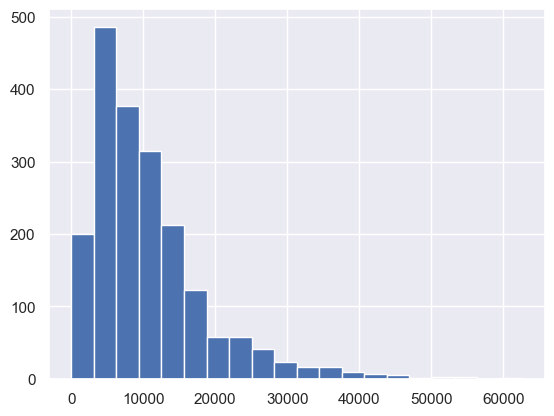

In [15]:
plt.hist(full_train['y'], bins = 20)

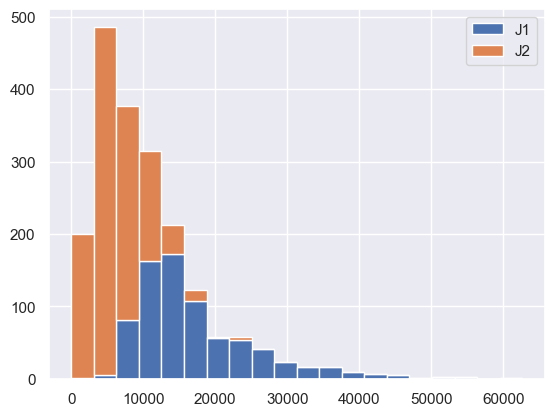

In [16]:
#目的変数の分布（J１、J２）
j1_train = full_train[full_train['stage'] == 'Ｊ１']
j2_train = full_train[full_train['stage'] == 'Ｊ２']
plt.hist([j1_train['y'], j2_train['y']], histtype='barstacked', bins=20,label=['J1', 'J2'])
plt.legend()
plt.show()

J1とJ2で目的変数の分布が大きく違うことがわかる

この２つのstageは区別して考えた方が良い可能性が高い

データの前処理

obuject型の特徴量をint型にする

ex) dictionary mapping, LabelEncoder

In [17]:
#object型の確認
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1953 non-null   int64  
 1   y            1953 non-null   int64  
 2   year         1953 non-null   int64  
 3   stage        1953 non-null   object 
 4   match        1953 non-null   object 
 5   gameday      1953 non-null   object 
 6   time         1953 non-null   object 
 7   home         1953 non-null   object 
 8   away         1953 non-null   object 
 9   stadium      1953 non-null   object 
 10  tv           1953 non-null   object 
 11  address      1953 non-null   object 
 12  capa         1953 non-null   int64  
 13  home_score   1953 non-null   int64  
 14  away_score   1953 non-null   int64  
 15  weather      1953 non-null   object 
 16  temperature  1953 non-null   float64
 17  humidity     1953 non-null   object 
 18  referee      1953 non-null   object 
 19  home_t

In [18]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 312
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           313 non-null    int64  
 1   year         313 non-null    int64  
 2   stage        313 non-null    object 
 3   match        313 non-null    object 
 4   gameday      313 non-null    object 
 5   time         313 non-null    object 
 6   home         313 non-null    object 
 7   away         313 non-null    object 
 8   stadium      313 non-null    object 
 9   tv           313 non-null    object 
 10  address      313 non-null    object 
 11  capa         313 non-null    int64  
 12  home_score   313 non-null    int64  
 13  away_score   313 non-null    int64  
 14  weather      313 non-null    object 
 15  temperature  313 non-null    float64
 16  humidity     313 non-null    object 
 17  referee      313 non-null    object 
 18  home_team    313 non-null    object 
 19  home_01 

In [19]:
full_train.select_dtypes(include='object').head()

,stage,match,gameday,time,home,away,stadium,tv,address,weather,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,宮城県仙台市泉区七北田字柳78,雨,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,愛知県豊田市千石町7-2,屋内,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,大阪府吹田市千里万博公園5-2,晴一時雨,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,広島県広島市安佐南区大塚西5-1-1,曇一時雨のち晴,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,北海道札幌市豊平区羊ヶ丘1,屋内,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


In [20]:
#object型をint型に直す

#第○節をsectionとして取り出す
full_train['section'] = full_train['match'].apply(lambda x : x.split('節')[0][1:]).astype(int)
full_test['section'] = full_test['match'].apply(lambda x : x.split('節')[0][1:]).astype(int)

# gamedayから月と曜日を取り出す
#曜日はdictionary mappingで数値化する(月（０）〜日（６）、祝日（７）をmappingとしてとる)
full_train['month'] = full_train['gameday'].apply(lambda x: x[:2]).astype(int)
full_train['weekday'] = full_train['gameday'].apply(lambda x: x[6])
full_test['month'] = full_test['gameday'].apply(lambda x: x[:2]).astype(int)
full_test['weekday'] = full_test['gameday'].apply(lambda x: x[6])

weekday_mapping = {'月':0, '火':1, '水':2, '木':3, '金':4, '土':5, '日':6}
full_train['weekday'] = full_train['weekday'].map(weekday_mapping)
full_train['weekday'] = full_train['weekday'].fillna(7)
full_test['weekday'] = full_test['weekday'].map(weekday_mapping)
full_test['weekday'] = full_test['weekday'].fillna(7)

#timeから時間を取り出す
full_train['hour'] = full_train['time'].apply(lambda x : x.split(':')[0]).astype(int)
full_test['hour'] = full_test['time'].apply(lambda x : x.split(':')[0]).astype(int)

#tvの放映数を数える
full_train['num_tv'] = full_train['tv'].apply(lambda x: len(x.split('／')))
full_test['num_tv'] = full_test['tv'].apply(lambda x: len(x.split('／')))


#weatherを雨もしくは雪を含む(0),晴を含む(2),屋内を含む(3),その他(1)とする
for i in range(len(full_train)):
    if '雨' in full_train.loc[i,'weather']:
        full_train.loc[i,'weather']=0
    elif '雪' in full_train.loc[i,'weather']:
        full_train.loc[i,'weather']=0
    elif  '晴' in full_train.loc[i,'weather']:
        full_train.loc[i,'weather']=2
    elif  '屋内' in full_train.loc[i,'weather']:
        full_train.loc[i,'weather']=3
    else:
        full_train.loc[i,'weather']=1
            
for i in range(len(full_test)):
    if '雨' in full_test.loc[i,'weather']:
        full_test.loc[i,'weather']=0
    elif '雪' in full_test.loc[i,'weather']:
        full_test.loc[i,'weather']=0
    elif  '晴' in full_test.loc[i,'weather']:
        full_test.loc[i,'weather']=2
    elif  '屋内' in full_test.loc[i,'weather']:
        full_test.loc[i,'weather']=3
    else:
        full_test.loc[i,'weather']=1
        
full_train = full_train.astype({'weather': int})
full_train['weather'] = full_train['weather'].astype(int)
full_test = full_test.astype({'weather': int})
full_test['weather'] = full_test['weather'].astype(int)

#humidityから数値だけを取り出す
full_train['humidity'] = full_train['humidity'].apply(lambda x: x.rstrip('%')).astype(int)
full_test['humidity'] = full_test['humidity'].apply(lambda x: x.rstrip('%')).astype(int)
    
#stage,home,away,stadium,address,referee,home_1~home_11,away_1~away_11はLabelEncoderで数値化する
from sklearn.preprocessing import LabelEncoder

for column in ['stage', 'home', 'away','stadium','referee', 'home_01', 'home_02', 'home_03','home_04',
           'home_05', 'home_06', 'home_07', 'home_08', 'home_09','home_10', 'home_11',
           'away_01', 'away_02', 'away_03','away_04', 'away_05', 'away_06', 
           'away_07', 'away_08', 'away_09', 'away_10', 'away_11','address']:
    le = LabelEncoder()
    le.fit(full_train[column])
    full_train[column] = le.transform(full_train[column])
    
for column in ['stage', 'home', 'away','stadium','referee', 'home_01', 'home_02', 'home_03','home_04',
           'home_05', 'home_06', 'home_07', 'home_08', 'home_09','home_10', 'home_11',
           'away_01', 'away_02', 'away_03','away_04', 'away_05', 'away_06', 
           'away_07', 'away_08', 'away_09', 'away_10', 'away_11','address']:
    le = LabelEncoder()
    le.fit(full_test[column])
    full_test[column] = le.transform(full_test[column])
    
display(full_train.head(), full_test.head())


,id,y,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,section,month,weekday,hour,num_tv
0,13994,18250,2012,0,第１節第１日,03/10(土),14:04,16,38,15,スカパー／ｅ２／スカパー光／ＮＨＫ総合,15,19694,1,0,0,3.80,66,35,ベガルタ仙台,54,207,210,32,205,128,283,127,375,6,257,鹿島アントラーズ,44,135,109,43,0,325,110,162,204,136,31,1,3,5,14,4
1,13995,24316,2012,0,第１節第１日,03/10(土),14:04,22,36,48,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,29,40000,1,0,3,12.40,43,48,名古屋グランパス,60,177,159,82,280,57,13,326,365,25,225,清水エスパルス,57,64,108,7,152,198,237,231,389,0,122,1,3,5,14,4
2,13996,17066,2012,0,第１節第１日,03/10(土),14:04,5,20,17,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,13,21000,2,3,0,11.30,41,52,ガンバ大阪,88,58,33,46,240,178,287,76,64,69,50,ヴィッセル神戸,41,235,55,53,214,40,252,360,251,231,121,1,3,5,14,4
3,13997,29603,2012,0,第１節第１日,03/10(土),14:06,9,35,3,スカパー／ｅ２／スカパー光／ＮＨＫ広島,25,50000,1,0,0,11.40,52,38,サンフレッチェ広島,89,146,56,154,25,310,209,168,307,377,103,浦和レッズ,17,174,218,149,141,315,160,240,226,117,230,1,3,5,14,4
4,13998,25353,2012,0,第１節第１日,03/10(土),14:04,7,13,36,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,6,39232,0,0,3,22.50,32,30,コンサドーレ札幌,49,257,12,92,127,236,145,340,83,172,108,ジュビロ磐田,39,257,17,209,128,138,155,175,219,310,105,1,3,5,14,4


,id,year,stage,match,gameday,time,home,away,stadium,tv,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,section,month,weekday,hour,num_tv
0,15822,2014,0,第１８節第１日,08/02(土),19:04,14,22,14,スカパー！／スカパー！プレミアムサービス,14,19694,2,2,2,27.40,70,2,ベガルタ仙台,56,89,66,91,86,53,52,108,73,109,3,大宮アルディージャ,46,14,20,61,115,88,34,46,49,20,14,18,8,5,19,2
1,15823,2014,0,第１８節第１日,08/02(土),18:34,36,8,36,スカパー！／スカパー！プレミアムサービス,39,40728,5,1,2,30.80,65,17,鹿島アントラーズ,22,95,57,56,47,85,57,1,14,35,12,サンフレッチェ広島,12,25,26,66,62,83,80,55,116,136,36,18,8,5,18,2
2,15824,2014,0,第１８節第１日,08/02(土),19:04,33,18,22,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉,9,63700,2,2,2,31.70,58,22,浦和レッズ,49,64,93,61,52,123,114,47,72,75,81,ヴィッセル神戸,20,71,31,38,66,77,41,136,51,91,24,18,8,5,19,4
3,15825,2014,0,第１８節第１日,08/02(土),19:03,28,23,28,スカパー！／スカパー！プレミアムサービス,7,15349,4,1,2,29.30,76,34,柏レイソル,48,93,99,34,61,111,83,43,134,21,52,川崎フロンターレ,27,37,36,83,85,46,18,84,135,54,44,18,8,5,19,2
4,15827,2014,0,第１８節第１日,08/02(土),19:03,1,12,6,スカパー！／スカパー！プレミアムサービス,25,42300,1,0,2,30.40,68,4,アルビレックス新潟,13,60,80,38,55,15,55,57,98,92,48,セレッソ大阪,1,96,17,44,48,72,58,1,8,37,65,18,8,5,19,2


In [21]:
#不要な変数の削除
full_train = full_train.drop(['id', 'match', 'gameday', 'time', 'tv', 'home_team', 'away_team'], axis=1)
full_test = full_test.drop(['id', 'match', 'gameday', 'time', 'tv', 'home_team', 'away_team'], axis=1)

display(full_train.head(), full_test.head())

,y,year,stage,home,away,stadium,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,section,month,weekday,hour,num_tv
0,18250,2012,0,16,38,15,15,19694,1,0,0,3.80,66,35,54,207,210,32,205,128,283,127,375,6,257,44,135,109,43,0,325,110,162,204,136,31,1,3,5,14,4
1,24316,2012,0,22,36,48,29,40000,1,0,3,12.40,43,48,60,177,159,82,280,57,13,326,365,25,225,57,64,108,7,152,198,237,231,389,0,122,1,3,5,14,4
2,17066,2012,0,5,20,17,13,21000,2,3,0,11.30,41,52,88,58,33,46,240,178,287,76,64,69,50,41,235,55,53,214,40,252,360,251,231,121,1,3,5,14,4
3,29603,2012,0,9,35,3,25,50000,1,0,0,11.40,52,38,89,146,56,154,25,310,209,168,307,377,103,17,174,218,149,141,315,160,240,226,117,230,1,3,5,14,4
4,25353,2012,0,7,13,36,6,39232,0,0,3,22.50,32,30,49,257,12,92,127,236,145,340,83,172,108,39,257,17,209,128,138,155,175,219,310,105,1,3,5,14,4


,year,stage,home,away,stadium,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,section,month,weekday,hour,num_tv
0,2014,0,14,22,14,14,19694,2,2,2,27.40,70,2,56,89,66,91,86,53,52,108,73,109,3,46,14,20,61,115,88,34,46,49,20,14,18,8,5,19,2
1,2014,0,36,8,36,39,40728,5,1,2,30.80,65,17,22,95,57,56,47,85,57,1,14,35,12,12,25,26,66,62,83,80,55,116,136,36,18,8,5,18,2
2,2014,0,33,18,22,9,63700,2,2,2,31.70,58,22,49,64,93,61,52,123,114,47,72,75,81,20,71,31,38,66,77,41,136,51,91,24,18,8,5,19,4
3,2014,0,28,23,28,7,15349,4,1,2,29.30,76,34,48,93,99,34,61,111,83,43,134,21,52,27,37,36,83,85,46,18,84,135,54,44,18,8,5,19,2
4,2014,0,1,12,6,25,42300,1,0,2,30.40,68,4,13,60,80,38,55,15,55,57,98,92,48,1,96,17,44,48,72,58,1,8,37,65,18,8,5,19,2


In [22]:
#型の確認
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   y            1953 non-null   int64  
 1   year         1953 non-null   int64  
 2   stage        1953 non-null   int64  
 3   home         1953 non-null   int64  
 4   away         1953 non-null   int64  
 5   stadium      1953 non-null   int64  
 6   address      1953 non-null   int64  
 7   capa         1953 non-null   int64  
 8   home_score   1953 non-null   int64  
 9   away_score   1953 non-null   int64  
 10  weather      1953 non-null   int64  
 11  temperature  1953 non-null   float64
 12  humidity     1953 non-null   int64  
 13  referee      1953 non-null   int64  
 14  home_01      1953 non-null   int64  
 15  home_02      1953 non-null   int64  
 16  home_03      1953 non-null   int64  
 17  home_04      1953 non-null   int64  
 18  home_05      1953 non-null   int64  
 19  home_0

In [23]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 312
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         313 non-null    int64  
 1   stage        313 non-null    int64  
 2   home         313 non-null    int64  
 3   away         313 non-null    int64  
 4   stadium      313 non-null    int64  
 5   address      313 non-null    int64  
 6   capa         313 non-null    int64  
 7   home_score   313 non-null    int64  
 8   away_score   313 non-null    int64  
 9   weather      313 non-null    int64  
 10  temperature  313 non-null    float64
 11  humidity     313 non-null    int64  
 12  referee      313 non-null    int64  
 13  home_01      313 non-null    int64  
 14  home_02      313 non-null    int64  
 15  home_03      313 non-null    int64  
 16  home_04      313 non-null    int64  
 17  home_05      313 non-null    int64  
 18  home_06      313 non-null    int64  
 19  home_07 

In [24]:
#統計量の確認
full_train.describe()

,y,year,stage,home,away,stadium,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,section,month,weekday,hour,num_tv
count,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00,1953.00
mean,10629.56,2012.82,0.61,21.11,21.07,26.24,28.50,25688.55,1.37,1.20,1.43,20.44,60.22,30.57,50.93,137.52,118.86,118.73,149.55,169.55,156.39,198.07,208.54,201.96,153.00,52.24,141.88,121.17,125.25,155.58,175.61,166.12,201.21,211.63,196.33,155.62,18.05,6.32,4.92,16.31,2.66
std,8102.32,0.76,0.49,12.05,12.06,17.38,16.24,14016.93,1.20,1.13,0.81,6.44,19.95,12.88,30.18,70.49,64.92,68.96,86.15,94.90,92.71,107.93,115.94,112.28,86.02,30.89,71.87,65.71,72.79,87.56,98.45,96.25,112.37,115.17,109.95,87.56,11.15,2.50,1.48,2.31,0.72
min,0.00,2012.00,0.00,0.00,0.00,0.00,0.00,3560.00,0.00,0.00,0.00,1.40,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,12.00,1.00
25%,4687.00,2012.00,0.00,11.00,11.00,11.00,14.00,15589.00,0.00,0.00,1.00,15.80,44.00,19.00,24.00,84.00,65.00,58.00,67.00,86.00,73.00,108.00,110.00,107.00,88.00,25.00,87.00,67.00,60.00,74.00,87.00,78.00,110.00,118.00,107.00,88.00,9.00,4.00,5.00,14.00,2.00
50%,8594.00,2013.00,1.00,21.00,21.00,24.00,28.00,20246.00,1.00,1.00,2.00,21.40,63.00,31.00,52.00,127.00,123.00,115.00,157.00,171.00,147.00,194.00,219.00,201.00,150.00,54.00,137.00,126.00,123.00,161.00,176.00,158.00,190.00,219.00,198.00,154.00,17.00,6.00,5.00,16.00,3.00
75%,13471.00,2013.00,1.00,31.00,31.00,39.00,42.00,30132.00,2.00,2.00,2.00,25.60,77.00,41.00,77.00,203.00,176.00,173.00,224.00,248.00,232.00,294.00,309.00,303.00,225.00,79.00,207.00,179.00,186.00,229.00,254.00,243.00,302.00,312.00,292.00,232.00,27.00,8.00,6.00,19.00,3.00
max,62632.00,2014.00,1.00,42.00,42.00,58.00,57.00,72327.00,7.00,8.00,3.00,34.20,99.00,52.00,106.00,261.00,226.00,244.00,294.00,331.00,326.00,379.00,393.00,383.00,303.00,109.00,266.00,230.00,255.00,308.00,345.00,338.00,394.00,398.00,379.00,308.00,42.00,12.00,6.00,20.00,5.00


In [25]:
full_test.describe()

,year,stage,home,away,stadium,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,section,month,weekday,hour,num_tv
count,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00,313.00
mean,2014.00,0.56,19.36,19.71,23.07,22.83,26493.35,1.43,1.17,1.41,21.67,64.89,17.36,28.45,57.66,56.66,48.82,50.62,63.66,67.15,65.29,65.95,61.86,51.37,31.95,59.06,52.59,50.30,55.15,60.78,62.26,71.45,71.90,68.51,53.52,30.16,9.42,5.07,16.66,2.38
std,0.00,0.50,11.43,11.45,13.57,13.15,14237.84,1.17,1.11,0.84,5.07,17.75,10.32,16.74,30.47,30.66,28.48,30.20,37.96,35.91,35.02,39.48,38.63,29.12,18.45,33.11,30.21,28.43,32.05,37.68,36.09,39.92,43.45,41.94,30.25,6.25,1.18,1.30,2.30,0.61
min,2014.00,0.00,0.00,0.00,0.00,0.00,7258.00,0.00,0.00,0.00,1.30,19.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00,8.00,0.00,12.00,2.00
25%,2014.00,0.00,10.00,10.00,12.00,12.00,15600.00,1.00,0.00,1.00,19.00,51.00,8.00,14.00,33.00,32.00,25.00,26.00,32.00,37.00,37.00,30.00,30.00,24.00,17.00,31.00,26.00,26.00,27.00,29.00,31.00,39.00,31.00,34.00,25.00,26.00,8.00,5.00,14.00,2.00
50%,2014.00,1.00,19.00,20.00,22.00,22.00,20396.00,1.00,1.00,2.00,22.60,66.00,18.00,29.00,58.00,56.00,49.00,47.00,62.00,67.00,65.00,64.00,62.00,53.00,31.00,58.00,53.00,50.00,53.00,61.00,59.00,72.00,70.00,66.00,55.00,30.00,9.00,5.00,18.00,2.00
75%,2014.00,1.00,29.00,29.00,33.00,34.00,32000.00,2.00,2.00,2.00,25.20,79.00,26.00,43.00,84.00,84.00,71.00,78.00,92.00,101.00,98.00,100.00,97.00,74.00,48.00,88.00,77.00,72.00,82.00,89.00,93.00,107.00,111.00,107.00,78.00,34.00,10.00,6.00,19.00,3.00
max,2014.00,1.00,39.00,39.00,47.00,46.00,72327.00,5.00,5.00,3.00,31.70,99.00,34.00,58.00,111.00,104.00,100.00,106.00,130.00,122.00,122.00,136.00,130.00,100.00,63.00,114.00,105.00,102.00,116.00,127.00,123.00,139.00,148.00,139.00,104.00,42.00,12.00,6.00,19.00,5.00


In [26]:
#full_trainのyの最小値が０のデータについて確認する
#この試合は実際に無観客であった
#https://www.nikkansports.com/soccer/news/f-sc-tp1-20140313-1269608.html
full_train[full_train['y'].isin([0.00])]

,y,year,stage,home,away,stadium,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,section,month,weekday,hour,num_tv
1385,0,2014,0,35,36,25,10,63700,1,1,2,16.20,23,51,89,246,199,146,132,303,193,132,238,114,243,66,194,114,7,82,241,79,319,118,43,285,4,3,6,15,3


In [27]:
# 外れ値として除外する
full_train.drop(index=1385, inplace=True)
full_train[full_train['y'].isin([0.00])]

,y,year,stage,home,away,stadium,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,section,month,weekday,hour,num_tv


In [28]:
#full_trainから目的変数yを取り出しtargetとする
y = pd.DataFrame(full_train, columns=['y'])
y.head()

,y
0,18250
1,24316
2,17066
3,29603
4,25353


In [29]:
x = full_train.drop('y', axis=1)
x.head()

,year,stage,home,away,stadium,address,capa,home_score,away_score,weather,temperature,humidity,referee,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,section,month,weekday,hour,num_tv
0,2012,0,16,38,15,15,19694,1,0,0,3.80,66,35,54,207,210,32,205,128,283,127,375,6,257,44,135,109,43,0,325,110,162,204,136,31,1,3,5,14,4
1,2012,0,22,36,48,29,40000,1,0,3,12.40,43,48,60,177,159,82,280,57,13,326,365,25,225,57,64,108,7,152,198,237,231,389,0,122,1,3,5,14,4
2,2012,0,5,20,17,13,21000,2,3,0,11.30,41,52,88,58,33,46,240,178,287,76,64,69,50,41,235,55,53,214,40,252,360,251,231,121,1,3,5,14,4
3,2012,0,9,35,3,25,50000,1,0,0,11.40,52,38,89,146,56,154,25,310,209,168,307,377,103,17,174,218,149,141,315,160,240,226,117,230,1,3,5,14,4
4,2012,0,7,13,36,6,39232,0,0,3,22.50,32,30,49,257,12,92,127,236,145,340,83,172,108,39,257,17,209,128,138,155,175,219,310,105,1,3,5,14,4


データの可視化

目的関数yと特徴量の相関を調べる

In [30]:
#full_trainの特徴量、目的変数の相関関係を確認する
print(full_train.corr()['y'])

y              1.00
year           0.00
stage         -0.67
home           0.11
away           0.06
stadium       -0.03
address       -0.18
capa           0.69
home_score     0.06
away_score     0.02
weather        0.08
temperature   -0.03
humidity      -0.10
referee        0.00
home_01        0.08
home_02       -0.03
home_03        0.12
home_04       -0.04
home_05       -0.05
home_06        0.08
home_07        0.17
home_08       -0.04
home_09       -0.08
home_10       -0.00
home_11       -0.15
away_01        0.07
away_02       -0.04
away_03        0.02
away_04       -0.03
away_05       -0.03
away_06        0.07
away_07        0.22
away_08        0.01
away_09       -0.09
away_10       -0.04
away_11       -0.12
section       -0.04
month          0.11
weekday       -0.04
hour           0.03
num_tv         0.14
Name: y, dtype: float64


yとcapaの相関関係に注目する

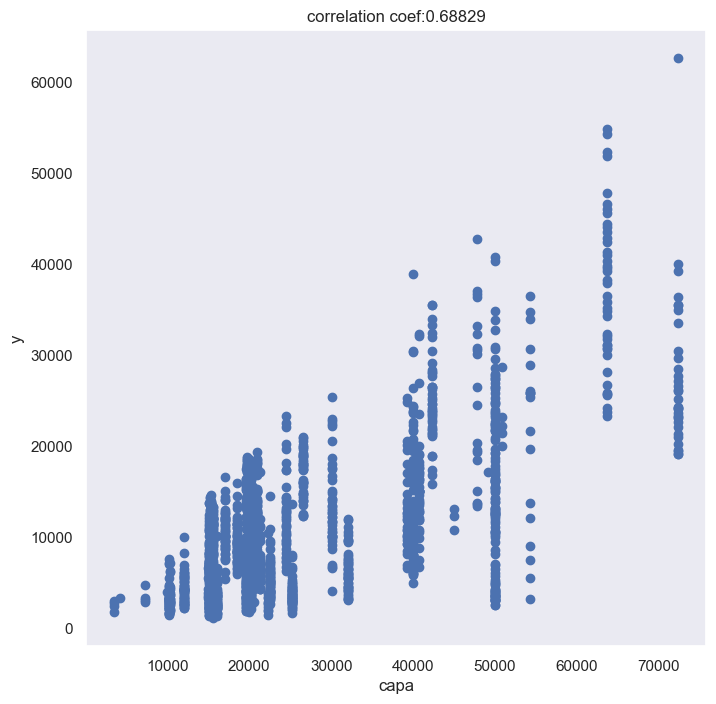

In [31]:
#yとcapaの散布図
plt.figure(figsize=(8,8))
plt.scatter(full_train['capa'], y)
plt.grid()
plt.xlabel('capa')
plt.ylabel('y')
plt.title('correlation coef:{}'.format(round(full_train.corr()['y']['capa'], 5)))
plt.show()

capaの多いスタジアムには相応の観客が来ていることが見て取れる

人気なチームやJ1の試合などその他の要素も重要な特徴量の可能性がある

yとtemperatureの相関関係に注目する

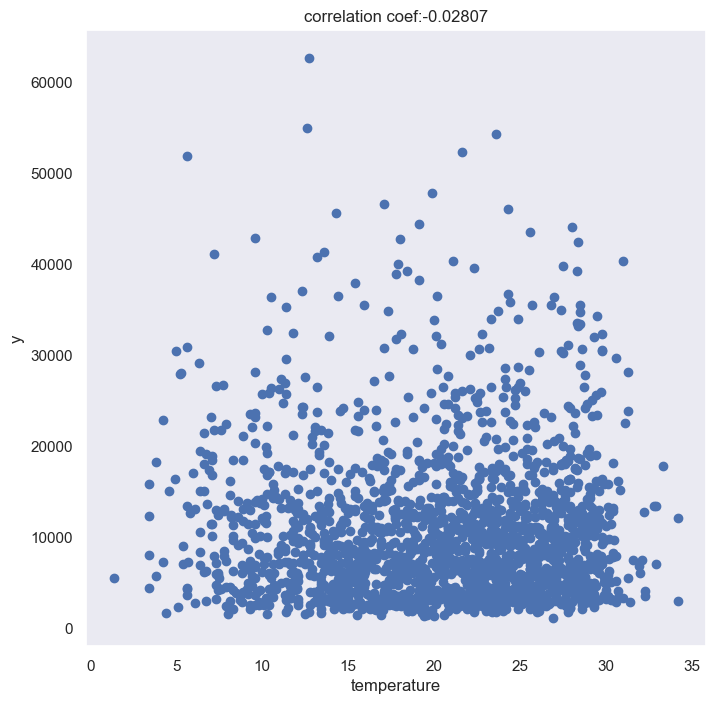

In [32]:
#yとtemperatureの散布図
plt.figure(figsize=(8,8))
plt.scatter(full_train['temperature'], y)
plt.grid()
plt.xlabel('temperature')
plt.ylabel('y')
plt.title('correlation coef:{}'.format(round(full_train.corr()['y']['temperature'], 5)))
plt.show()

yとweatherの相関関係に注目する

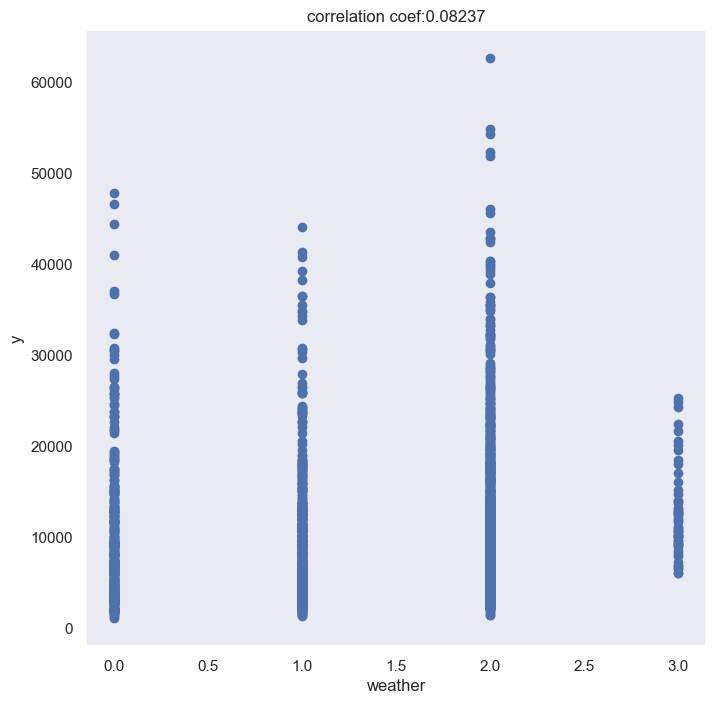

In [33]:
#yとweatherの散布図
plt.figure(figsize=(8,8))
plt.scatter(full_train['weather'], y)
plt.grid()
plt.xlabel('weather')
plt.ylabel('y')
plt.title('correlation coef:{}'.format(round(full_train.corr()['y']['weather'], 5)))
plt.show()

temperatureとweatherはあまり影響力がない特徴量だと考えることができる

また、yearとrefereeは共にyとの相関係数が０のため削除しても問題のない特徴量だと考えられる

次にsectionごとの観客動員数の分布を見る

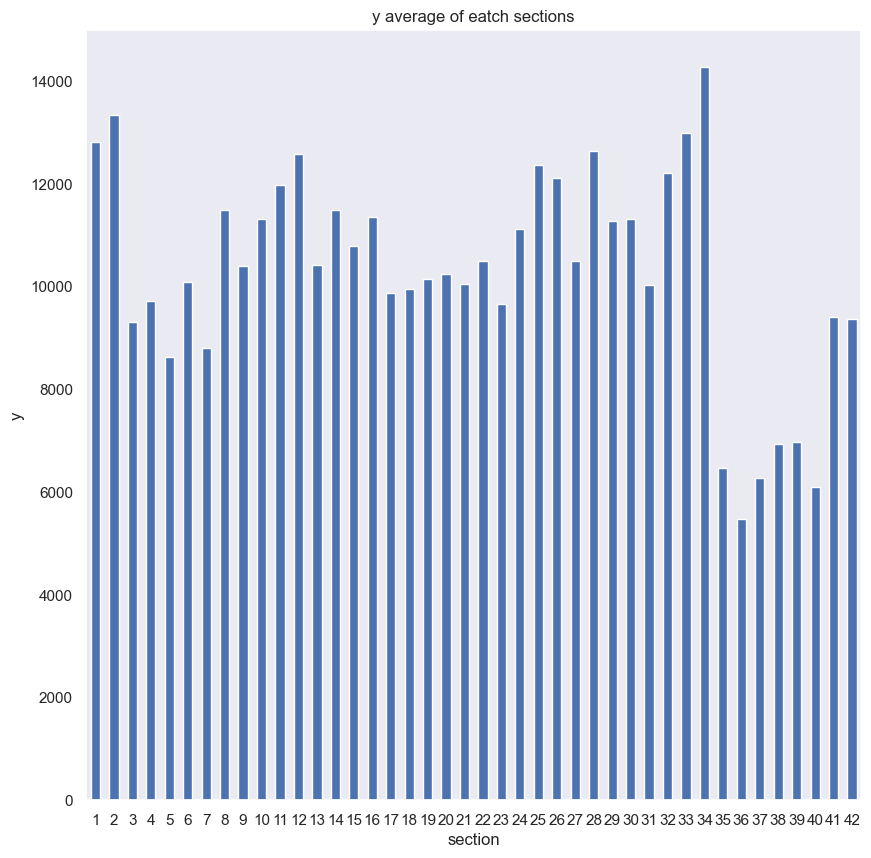

In [34]:
#sectionごとの平均観客動員数
plt.figure(figsize=(10, 10))
full_train.groupby('section')['y'].mean().plot.bar()
plt.grid()
plt.xticks(rotation=0)
plt.xlabel('section')
plt.ylabel('y')
plt.title('y average of eatch sections')
plt.show()

sectionが３５から急激に減少し４０まで低い数値なことが見て取れる

section35~40のデータを確認する

In [35]:
print('section35~40の試合数 : ', len(full_train.query('35<=section<=40')), 
      '平均観客動員数 : ', full_train.query('35<=section<=40')['y'].mean())
#適当に取った６sestionsの平均値
print('section15~20の試合数 : ', len(full_train.query('15<=section<=20')), 
      '平均観客動員数 : ', full_train.query('15<=section<=20')['y'].mean())

section35~40の試合数 :  132 平均観客動員数 :  6373.037878787879
section15~20の試合数 :  333 平均観客動員数 :  10421.711711711712


やはりyの平均値が大きく異なる

J1とJ2では観客動員数に差があることがわかってるのでstageごとに比較する

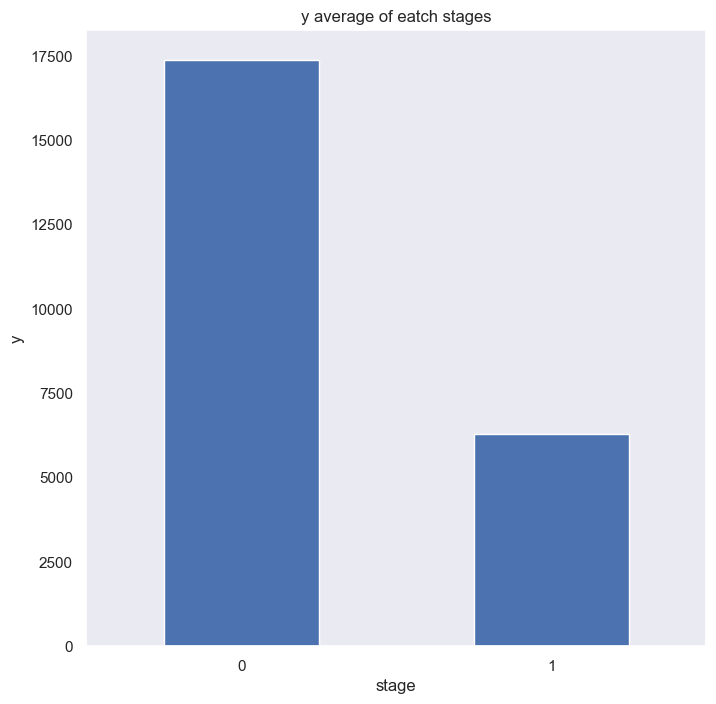

stage
0   17399.90
1    6284.52
Name: y, dtype: float64


In [36]:
#J1(0),J2(1)の平均観客動員数
plt.figure(figsize=(8, 8))
full_train.groupby('stage')['y'].mean().plot.bar()
plt.grid()
plt.xticks(rotation=0)
plt.xlabel('stage')
plt.ylabel('y')
plt.title('y average of eatch stages')
plt.show()
print(full_train.groupby('stage')['y'].mean())

J1とJ2には平均観客動員数にかなりの差があることがわかる

stage別に格sectionごとの平均観客動員数を見る

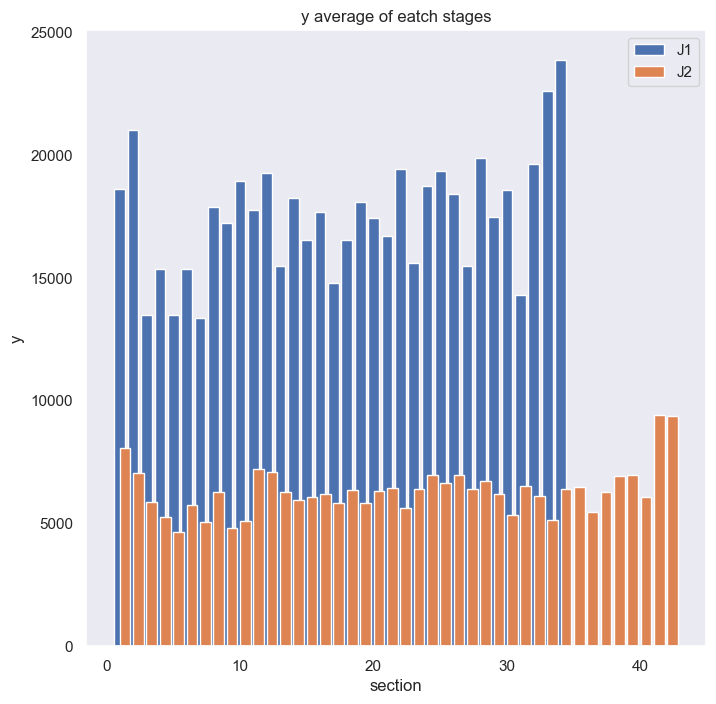

In [37]:
plt.figure(figsize=(8, 8))
J1 = full_train[full_train['stage'] == 0].groupby('section')['y'].mean()
J2 = full_train[full_train['stage'] == 1].groupby('section')['y'].mean()
plt.bar(J1.index, J1, label='J1')
plt.bar(J2.index, J2, label='J2', align='edge')
plt.xlabel('section')
plt.ylabel('y')
plt.title('y average of eatch stages')
plt.legend()
plt.grid()
plt.show()

section34でJ1の試合が終了していることがわかる

これによってsection35~40の平均観客動員数が低い理由がわかった

データの可視化によってわかったことを踏まえ、特徴量の選択をする

In [38]:
#yとの相関係数が０の特徴量の削除
x = x.drop(['year', 'referee'], axis=1)
full_test = full_test.drop(['year', 'referee'], axis=1)

In [39]:
#x,yの確認
display(x.head(), full_test.head())

,stage,home,away,stadium,address,capa,home_score,away_score,weather,temperature,humidity,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,section,month,weekday,hour,num_tv
0,0,16,38,15,15,19694,1,0,0,3.80,66,54,207,210,32,205,128,283,127,375,6,257,44,135,109,43,0,325,110,162,204,136,31,1,3,5,14,4
1,0,22,36,48,29,40000,1,0,3,12.40,43,60,177,159,82,280,57,13,326,365,25,225,57,64,108,7,152,198,237,231,389,0,122,1,3,5,14,4
2,0,5,20,17,13,21000,2,3,0,11.30,41,88,58,33,46,240,178,287,76,64,69,50,41,235,55,53,214,40,252,360,251,231,121,1,3,5,14,4
3,0,9,35,3,25,50000,1,0,0,11.40,52,89,146,56,154,25,310,209,168,307,377,103,17,174,218,149,141,315,160,240,226,117,230,1,3,5,14,4
4,0,7,13,36,6,39232,0,0,3,22.50,32,49,257,12,92,127,236,145,340,83,172,108,39,257,17,209,128,138,155,175,219,310,105,1,3,5,14,4


,stage,home,away,stadium,address,capa,home_score,away_score,weather,temperature,humidity,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,section,month,weekday,hour,num_tv
0,0,14,22,14,14,19694,2,2,2,27.40,70,56,89,66,91,86,53,52,108,73,109,3,46,14,20,61,115,88,34,46,49,20,14,18,8,5,19,2
1,0,36,8,36,39,40728,5,1,2,30.80,65,22,95,57,56,47,85,57,1,14,35,12,12,25,26,66,62,83,80,55,116,136,36,18,8,5,18,2
2,0,33,18,22,9,63700,2,2,2,31.70,58,49,64,93,61,52,123,114,47,72,75,81,20,71,31,38,66,77,41,136,51,91,24,18,8,5,19,4
3,0,28,23,28,7,15349,4,1,2,29.30,76,48,93,99,34,61,111,83,43,134,21,52,27,37,36,83,85,46,18,84,135,54,44,18,8,5,19,2
4,0,1,12,6,25,42300,1,0,2,30.40,68,13,60,80,38,55,15,55,57,98,92,48,1,96,17,44,48,72,58,1,8,37,65,18,8,5,19,2


モデルの選択と学習、評価

x, yを学習データとテストデータに分割する

In [40]:
#データの分割
#今回はtrain:test = 7:3にする
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1366, 38) (586, 38) (1366, 1) (586, 1)


RndomForestを用いて学習させる

In [56]:
#modelはRandomForest
#ハイパーパラメータのチューニングはGridSeachを用いる
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#基準としてパラメータ設定無しでRandomForestを行う
rf1 = RandomForestRegressor(random_state=0)
rf1.fit(x_train, y_train)

#rmse(標準二乗偏差)を評価の基準にする
from sklearn.metrics import mean_squared_error as mse
y_pred_train1 = rf1.predict(x_train)
y_pred_test1 = rf1.predict(x_test)

rmse_train1 = np.sqrt(mse(y_train, y_pred_train1))
rmse_test1 = np.sqrt(mse(y_test, y_pred_test1))

print('学習データ', rmse_train1)
print('評価データ', rmse_test1)

print(rf1.score(x_train, y_train))
print(rf1.score(x_test, y_test))

学習データ 1394.6859819267356
評価データ 3367.51469348163
0.9704531714753728
0.8252105073931105


In [43]:
#GridSearchを用いてパラメータをチューニングしていく
params = {
    'n_estimators': [10, 20, 30, 50, 100, 200, 300],
    'max_features': ['sqrt', 'log2','auto', None], 
    'max_depth': [10, 15, 20, 25, 30, None]

}

rf1 = RandomForestRegressor(random_state=0)

gs = GridSearchCV(estimator=rf1, 
                                  param_grid=params, 
                                  cv=5
                                 )

gs.fit(x_train, y_train)

print('Best params: {0}'.format(gs.best_params_))

Best params: {'max_depth': 15, 'max_features': 'auto', 'n_estimators': 300}


最適なパラメータでmodelを構築する

In [44]:
#RandomForestのパラメータを最適なものにする
rf2 = RandomForestRegressor(
    n_estimators=gs.best_params_['n_estimators'], 
    max_features=gs.best_params_['max_features'], 
    max_depth=gs.best_params_['max_depth'], 
    random_state=0
                          )

rf2.fit(x_train, y_train)

#rmse(標準二乗偏差)を評価の基準にする
y_pred_train2 = rf2.predict(x_train)
y_pred_test2 = rf2.predict(x_test)

rmse_train2 = np.sqrt(mse(y_train, y_pred_train2))
rmse_test2 = np.sqrt(mse(y_test, y_pred_test2))

print('学習データ', rmse_train2)
print('評価データ', rmse_test2)

print(rf2.score(x_train, y_train))
print(rf2.score(x_test, y_test))

学習データ 1398.269439184381
評価データ 3382.790920014569
0.9703011432476429
0.8236210977322949


デフォルトパラメータ時の結果を可視化する

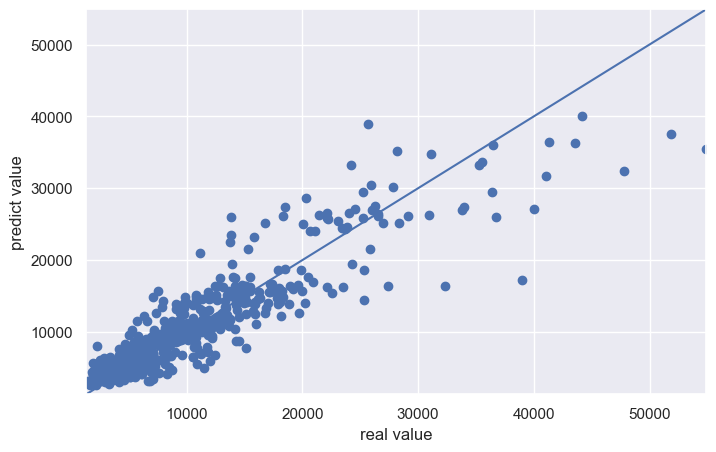

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test1)

min_value = min(y_test['y'].min(), y_pred_test1.min())
max_value = max(y_test['y'].max(), y_pred_test1.max())
plt.xlim([min_value, max_value])
plt.ylim([min_value, max_value])
plt.plot([min_value, max_value], [min_value, max_value])

plt.xlabel('real value')
plt.ylabel('predict value')
plt.show()

調整後パラメータ時の結果を可視化する

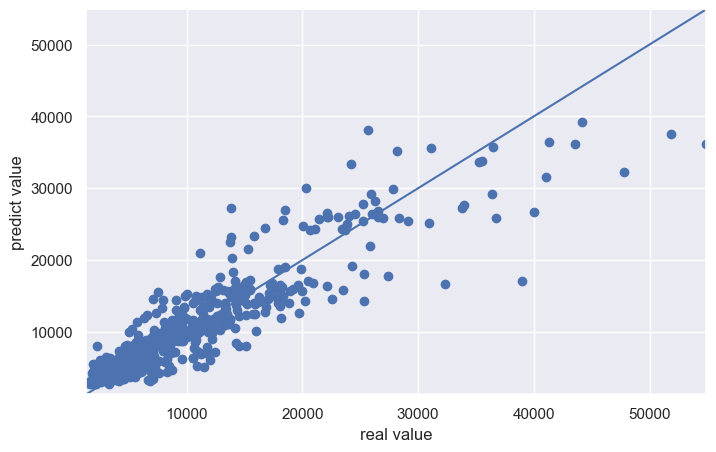

In [46]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test2)

min_value = min(y_test['y'].min(), y_pred_test2.min())
max_value = max(y_test['y'].max(), y_pred_test2.max())
plt.xlim([min_value, max_value])
plt.ylim([min_value, max_value])
plt.plot([min_value, max_value], [min_value, max_value])

plt.xlabel('real value')
plt.ylabel('predict value')
plt.show()

観客動員数が小さい時はうまく予測できてるが、観客動員数が大きくなると予測が難しい傾向にある

チューニング前後で優位性を確認することができなかった

n_estimatorを増やし学習データへの精度を上げることは容易であるがRandomForestは学習データを過学習する傾向にあるため
もう一度データの特徴量に焦点を当て、特徴選択に焦点を当てる

パタメータ調整後modelにおける特徴量重要度を確認する

<BarContainer object of 38 artists>

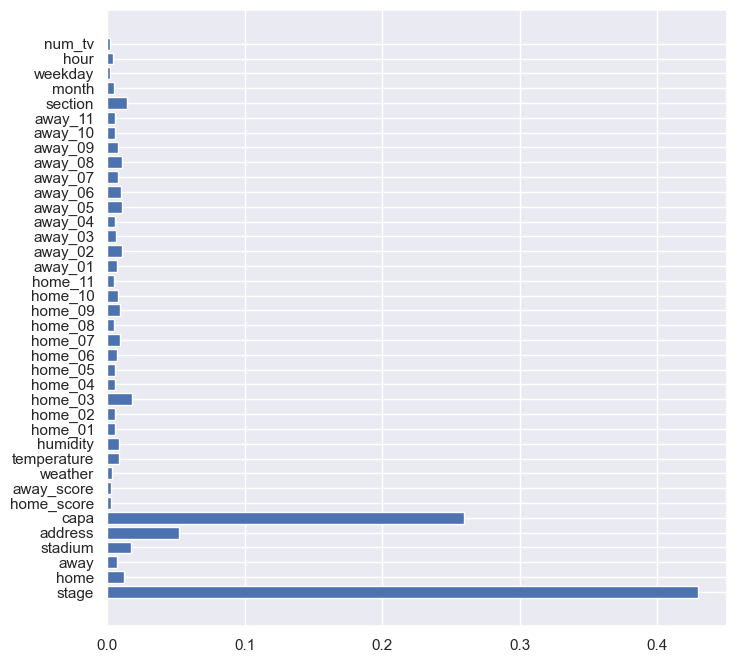

In [49]:
plt.figure(figsize=(8,8))
plt.barh(x.columns, rf2.feature_importances_)

特徴重要度がstage, capaに集中していることがわかるので重要度の高い特徴量だけを残し特徴量を減らしてみる

In [54]:
#param調整後の性能の再確認
#max_features='auto'=n_features
rf2 = RandomForestRegressor(
    n_estimators=300,
    max_features='auto',
    max_depth=15,
    random_state=0
                           )

rf2.fit(x_train, y_train)

#rmse(標準二乗偏差)を評価の基準にする
y_pred_train2 = rf2.predict(x_train)
y_pred_test2 = rf2.predict(x_test)

rmse_train2 = np.sqrt(mse(y_train, y_pred_train2))
rmse_test2 = np.sqrt(mse(y_test, y_pred_test2))

print('rf2学習データ', rmse_train2)
print('rf2評価データ', rmse_test2)

print(rf2.score(x_train, y_train))
print(rf2.score(x_test, y_test))

#特徴量を重要度順に並べる
#重要度順に並んだindexを作る
important_index = [i for importance, i in sorted(
    zip(rf2.feature_importances_, range(rf2.n_features_)),
    key=lambda x: x[0], reverse=True)]

#特徴量の次元を30,25,20,15,10,5の６パターンで試す
for n_features in [30, 25, 20, 15,10,5] :
    index = important_index[: n_features]
    
    #重要な特徴だけで選択し特徴量をつくる
    selected_x_train = x_train.iloc[:, index]
    selected_x_test = x_test.iloc[:, index]
    
    rf3 = RandomForestRegressor(
    n_estimators=300,
    max_features='auto',
    max_depth=15,
    random_state=0
                           )
    rf3.fit(selected_x_train, y_train)
    
    #rmse(標準二乗偏差)を評価の基準にする
    y_pred_train3 = rf3.predict(selected_x_train)
    y_pred_test3 = rf3.predict(selected_x_test)

    rmse_train3 = np.sqrt(mse(y_train, y_pred_train3))
    rmse_test3 = np.sqrt(mse(y_test, y_pred_test3))

    print('{0}:rf3学習データ'.format(n_features), rmse_train3)
    print('{0}:rf3評価データ'.format(n_features), rmse_test3)

    print(rf3.score(selected_x_train, y_train))
    print(rf3.score(selected_x_test, y_test))
    

rf2学習データ 1398.269439184381
rf2評価データ 3382.790920014569
0.9703011432476429
0.8236210977322949
30:rf3学習データ 1397.3530239503168
30:rf3評価データ 3407.9486207774967
0.9703400593038197
0.8209878947186109
25:rf3学習データ 1399.7020609483639
25:rf3評価データ 3425.0144097761763
0.9702402550903038
0.8191905484033202
20:rf3学習データ 1388.9379709779114
20:rf3評価データ 3412.1611773602863
0.9706962161735637
0.8205450683874909
15:rf3学習データ 1389.637306168002
15:rf3評価データ 3444.1975866379626
0.9706666996266018
0.8171594836316222
10:rf3学習データ 1394.0730690394719
10:rf3評価データ 3481.7314313289717
0.970479135244936
0.8131526859682289
5:rf3学習データ 3237.6864603024324
5:rf3評価データ 3756.8835636326376
0.840769016224136
0.7824536538070799


特徴重要度が高いものをの優先的に残し次元削減した

学習データについてのRMSEは特徴量が30, 20, 15,10において減少したが評価データについてのRMSEは増加してしまった

改善案

選手名、チームのデータはLabelEncodingしただけなのであまり意味のないものとなってしまっている

外部データを用いてチームランキングを代入したり日本代表が在籍しているチームに重みをつけることで有意なデータにすることができる

外部データなしではホームとアウェイの観客動員数の差を見てみるのもいいかもしれない（人気なチームはアウェイでも観客を増やせる可能性が高いため）

modelをRandomForestに絞って考えていたが特徴量が多いのでLasso回帰やRidge回帰、LGBMが有用の可能性がある

この場合特徴量の多重共線性を重視し、より相関係数に注目することが必要とされる

また、RandomForestのパラメータ調整にGridSearchを用いたがあまり有用な結果が得られなかった



予測と結果

rf1

In [57]:
#full_testの予測
predict = rf1.predict(full_test)

#提出ファイルの読み込み
submit = pd.read_csv('sample_submit.csv', header=None)

#提出ファイル
submit[1] = predict
submit.to_csv('new_submit.csv', header=None, index=False)

submit.head()

,0,1
0,15822,15002.15
1,15823,17518.20
2,15824,31926.37
3,15825,11737.14
4,15827,26493.18


rf2

In [59]:
#full_testの予測
predict = rf2.predict(full_test)

#提出ファイルの読み込み
submit = pd.read_csv('sample_submit.csv', header=None)

#提出ファイル
submit[1] = predict
submit.to_csv('new1_submit.csv', header=None, index=False)

submit.head()

,0,1
0,15822,14470.46
1,15823,16944.87
2,15824,31750.96
3,15825,11880.47
4,15827,25789.23
